# Examples of the PlantGL paper in Graphical Model 2009

In [16]:
from openalea.plantgl.all import *
from openalea.plantgl.algo.view import *
from math import *

## Example of section 3.1 - Pine cone

In [8]:
lpts1 = [(0,-1,0),(0.6,-0.7,0.05),(1,-0.3,0.1),(0.7,0.5,0.2),(0,0.8,0.3)]
lpts2 = lpts1+[(-i[0],i[1],i[2]) for i in lpts1[-2:0:-1]]

pts = Point3Array([Vector3(i[0],i[1],i[2]) for i in lpts2]+[Vector3(0,0,0.5)])
nbPoints = len(pts)

indices = [Index3(i,i+1,nbPoints-1) for i in range(nbPoints-2)]+[Index3(nbPoints-2,0,nbPoints-1)]
tr = TriangleSet(pts,Index3Array(indices))

pts2 = Point3Array([i+Vector3(0,0,-0.05) for i in pts])
bottom = pts2[-1]
bottom.z = -0.15
pts2[-1] = bottom
tr2 = TriangleSet(pts2,Index3Array(indices))

indices2 = [Index4(i,i+1,nbPoints+i+1,nbPoints+i) for i in range(nbPoints-2)]+[Index4(nbPoints-2,0,nbPoints,2*nbPoints-2)]
qud1 = QuadSet(Point3Array([i for i in pts]+[i for i in pts2]),Index4Array(indices2))

pts3 = Point3Array([Vector3(i.x/3.,i.y/3,i.z/3+0.35) for i in pts])
tr3 = TriangleSet(pts3,Index3Array(indices))

pts4 = Point3Array([i+Vector3(0,0,-0.2) for i in pts3])
tr4 = TriangleSet(pts4,Index3Array(indices))

indices3 = [Index4(i,i+1,nbPoints+i+1,nbPoints+i) for i in range(nbPoints-2)]+[Index4(nbPoints-2,0,nbPoints,2*nbPoints-2)]
qud2 = QuadSet(Point3Array([i for i in pts3]+[i for i in pts4]),Index4Array(indices3))

scale = Group([tr,tr2,qud1,tr3,tr4,qud2])
scale.name = "petal"

mat = Material("pine_mat",Color3(20,16,11),3)
scalescene = Scene([Shape(scale,mat)])


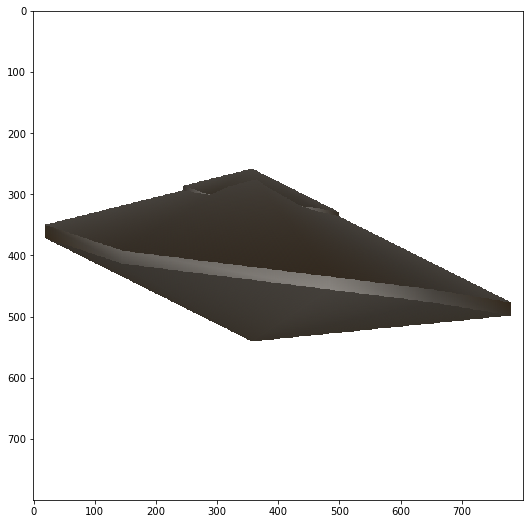

In [10]:
view(scalescene)

In [11]:
lptsA = [(1,0.7,0.2),(1,0,0),(1,-0.7,0.1)]
lptsB = [(0.5,0.5,0.2),(0.5,0,0.15),(0.5,-0.5,0.2)]
lptsC = [(0,0.2,1),(0,0,1),(0,-0.2,1)]

pts = Point3Array([Vector3(i[0],i[1],i[2]) for i in lptsA+lptsB+lptsC])
indices4 = [Index4(i,i+1,3+i+1,3+i) for i in range(2)]+[Index4(i,i+1,3+i+1,3+i) for i in range(3,5)]

br = QuadSet(pts,Index4Array(indices4))
br.name = 'branch'

mat2 = Material("pine_mat2",Color3(20,16,11),1)

branch = Scene([Shape(br,mat2)])

In [54]:
pinecone = Scene()
nbBotScale = 80
nbTopScale = 80
deltaAngle = 2*pi/((1+sqrt(5))/2)

def distToTrunk(u): # with u in [0,160], u < 80 for the bottom part
    if u < nbBotScale: return 6+u*0.5
    else: return -log(1+(u-nbBotScale)/10.)*20

def scaleHeight(u):
    if u < nbBotScale: return -u*0.15
    else: return -nbTopScale-10+(u-nbBotScale)

def scaleSize(u):
    if u < nbBotScale: return 1.5*(1+log(1+u)) 
    else: return 1.5*(1+log(1+(u-nbBotScale)))
    
for i in range(nbBotScale):
   pinecone += Shape(AxisRotated(Vector3.OZ,(i*deltaAngle) % (2*pi),
                                 Translated(Vector3(distToTrunk(i),0,scaleHeight(i)),
                                            Scaled(scaleSize(i),scale))),mat,i)


for i in range(nbTopScale):
    if i % 1 == 0:
        i += nbBotScale
        angle = (i*deltaAngle) % (2*pi)
        pinecone += Shape(AxisRotated(Vector3.OZ, angle,
                                      Translated(Vector3(distToTrunk(i),0,scaleHeight(i)),
                                                 Scaled(scaleSize(i),scale))),mat)
        pinecone += Shape(AxisRotated(Vector3.OZ, angle,
                                Translated(Vector3(0,0,scaleHeight(i)),
                                           Scaled(Vector3(distToTrunk(i),scaleSize(i),scaleSize(i)),br))),mat2)

trunk = AxisRotated(Vector3.OX,pi,Translated(Vector3.OZ*-5,Frustum(6,92,0.2)))
trunk.name='trunk'
pinecone += Shape(trunk,mat)

In [55]:
interactive_view(pinecone)

interactive(children=(Checkbox(value=False, description='perspective'), FloatSlider(value=1.0, description='zo…

In [47]:
delta_angle = pi/(1+sqrt(5)) # golden angle between each scale
nb_scale, max_pine_radius, max_scale_size = 160, 50, 15 
bottom_height, top_height = 10, 90 # global dimensions of the pine cone

def distToTrunk(u): # with u in [0,2], u < 1 for the bottom part
    if u < 1: return max_pine_radius*u
    else: return max_pine_radius*((2-u)**2)

def scaleSize(u):
    if u < 1: return max_scale_size*log(1 + u,2) 
    else: return max_scale_size*log(3-u,2)

def scaleHeight(u):
    if u < 1: return u * bottom_height
    else: return bottom_height + (u - 1) * top_height

pinecone = Scene()
for i in range(nb_scale):
    u = 2*i/nb_scale
    pinecone += Shape(AxisRotated(Vector3.OZ,i*deltaAngle,
                                  Translated((distToTrunk(u),0,scaleHeight(u)), 
                                            Scaled(scaleSize(u),scale))),mat)

In [49]:
interactive_view(pinecone)

interactive(children=(Checkbox(value=False, description='perspective'), FloatSlider(value=1.0, description='zo…